# GLONET test run 

As a first user of GLONET, let's make a forecast on my own project bucket.<br> 


## prerequisite
Tell the python a target the repository where it should look at while the execution of code. <br>
If not, the imported module could not read the module itself which is imported in script itself.

(Simply, we can make a Jupyter notebook file in src repository. Meanwhile, src is src. We don't want messy the code)


In [1]:
import sys, os

src_path = os.path.abspath(os.path.join(os.getcwd(), "src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from get_inits import generate_initial_data
from glonet_forecast import create_forecast
from model import synchronize_model_locally
from s3_upload import save_bytes_to_s3

/home/onyxia/miniforge3/envs/glon/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


For the sake of simplicity, let's define some arguments of function as a **FINAL_TYPE_VARIABLE**. <br>
In this example, 2025/07/01 NetCDF data is chosen. 

In [2]:
EDITO_BUCKET_NAME="project-da-ml"
URL="https://minio.dive.edito.eu/project-glonet/public/glonet_1_4_daily_forecast/2025-07-01/GLONET_MOI_2025-07-02_2025-07-11.nc"

Cuda availiablity check <br>

In [3]:
import torch

print("PyTorch version:      ", torch.__version__)
print("CUDA available:       ", torch.cuda.is_available())
print("CUDA version (build): ", torch.version.cuda)
print("cuDNN version:        ", torch.backends.cudnn.version())


PyTorch version:       2.7.1+cu126
CUDA available:        True
CUDA version (build):  12.6
cuDNN version:         90501


## Input data

The whole 3D ocean data is too huge to compute all at one time. So the GLONET takes 3 divided files as a input.<br>
In this example, a past date is chosen for the forecasting which means the sliced input file is already exist. If not, they will be created by the function **generate_initila_data()**

In [4]:
# Divid inital states array in 3 files
cif1, cif2, cif3 = generate_initial_data(bucket_name=EDITO_BUCKET_NAME, 
                                        forecast_netcdf_file_url=URL)

Initial file already exists: https://minio.dive.edito.eu/project-glonet/public/glonet_1_4_daily_forecast/2025-07-01/inits/in1.nc
Initial file already exists: https://minio.dive.edito.eu/project-glonet/public/glonet_1_4_daily_forecast/2025-07-01/inits/in2.nc
Initial file already exists: https://minio.dive.edito.eu/project-glonet/public/glonet_1_4_daily_forecast/2025-07-01/inits/in3.nc


## Syncronizing model
The GLONET is already trained with a dataset. More specifically, a dataset interpolated in $1/4^{\circ}$ degree spatial resolution from  a issue of the GLORYS12 which has $1/12^{\circ}$ spatial resolution. The trained model is stored in a clould, and in this example we are going to simply copy that model (weights).

In [5]:
local_dir = "../TrainedWeights"
synchronize_model_locally(local_dir=local_dir)

Syncing project-glonet/glonet_1_4_model/20241112/model/ in ../TrainedWeights...
Files project-glonet/glonet_1_4_model/20241112/model/ synced in ../TrainedWeights


## Forecast
Now, we have the GLONET forecast model and it's input.<br>
It's time to make output **forecast** file.


In [6]:
forecast_file_nc = create_forecast(forecast_netcdf_file_url=URL,
                                model_dir=local_dir, 
                                initial_file_1_url=cif1, 
                                initial_file_2_url=cif2, 
                                initial_file_3_url=cif3)

Creating 2025-07-01 forecast from 2025-06-30 to 2025-07-01...
1


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:102: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


2


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:102: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


3


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:102: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


4


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:102: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


5


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:102: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


1


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:156: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


2


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:156: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


3


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:156: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


4


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:156: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


5


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:156: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


1


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:208: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


2


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:208: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


3


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:208: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


4


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:208: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


5


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:208: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Time to get-process data: 0.2811 seconds
Time taken by for 10 days on cpu: 484.2370 seconds


## Visualization of the output file
first, examine the file.

In [7]:
forecast_file_nc


<xarray.Dataset> Size: 7GB
Dimensions:    (time: 10, depth: 21, latitude: 672, longitude: 1440)
Coordinates:
  * depth      (depth) float32 84B 0.494 47.37 92.33 ... 4.833e+03 5.275e+03
  * latitude   (latitude) float64 5kB -78.0 -77.75 -77.5 ... 89.25 89.5 89.75
  * longitude  (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
  * time       (time) datetime64[s] 80B 2025-07-02 2025-07-03 ... 2025-07-11
Data variables:
    thetao     (time, depth, latitude, longitude) float64 2GB nan nan ... nan
    zos        (time, latitude, longitude) float64 77MB nan nan ... -0.3361
    uo         (time, depth, latitude, longitude) float64 2GB nan nan ... nan
    vo         (time, depth, latitude, longitude) float64 2GB nan nan ... nan
    so         (time, depth, latitude, longitude) float64 2GB nan nan ... nan
Attributes:
    Conventions:  CF-1.8
    area:         Global
    contact:      glonet@mercator-ocean.eu
    institution:  Mercator Ocean International
    source:       MOI GLONET
    title:        daily mean fields from GLONET 1/4 degree resolution Forecas...
    references:   www.edito.eu

Then, we can plot it by data variables

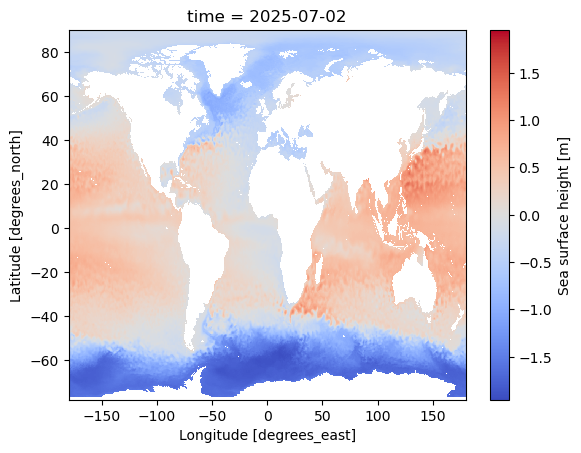

In [36]:
import matplotlib.pyplot as plt

window = forecast_file_nc["zos"][0]
window.plot(cmap='coolwarm')


### Visulaize interested zone

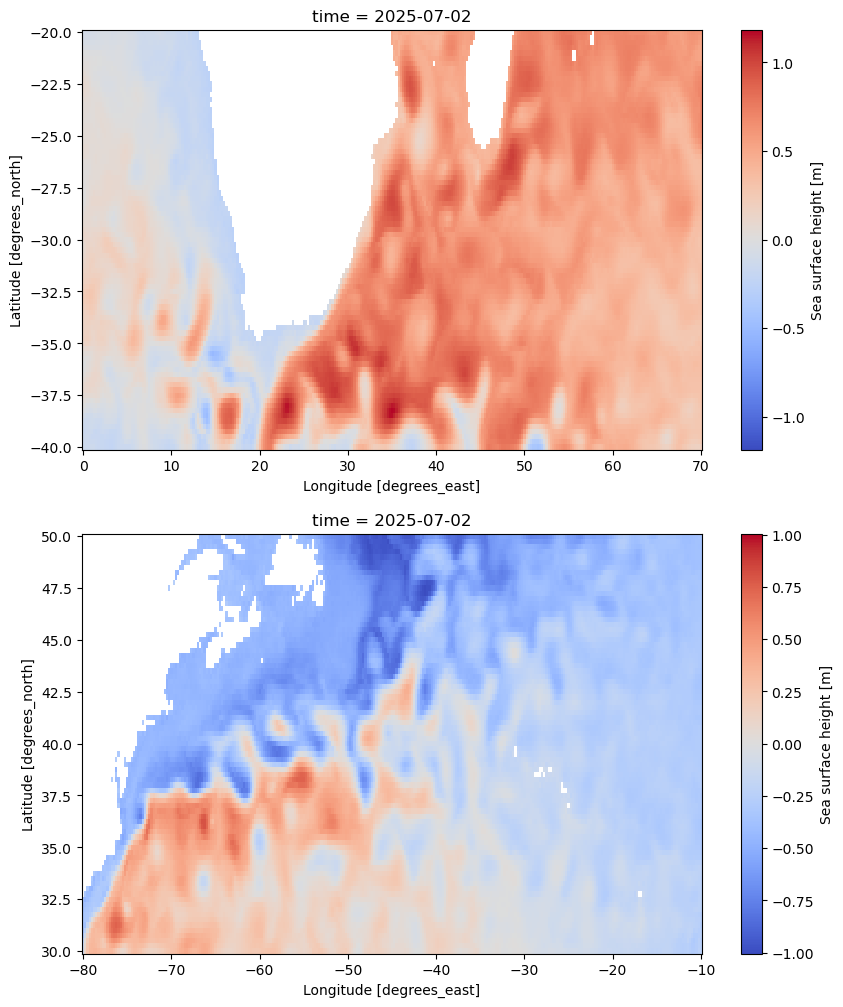

In [49]:
# Define the zoom region (latitude and longitude bounds)
lat_min1, lat_max1, lat_min2, lat_max2 = -40, -20, 30 , 50
lon_min1, lon_max1, lon_min2, lon_max2 = 0, 70, -80, -10

zone1 = window.sel(latitude=slice(lat_min1, lat_max1), longitude=slice(lon_min1, lon_max1))
zone2 = window.sel(latitude=slice(lat_min2, lat_max2), longitude=slice(lon_min2, lon_max2))

# Define the size of subplot
plt.figure(figsize=(10, 12))  
plt.subplot(2, 1 ,1)
zone1.plot(cmap='coolwarm')
plt.subplot(2, 1, 2)
zone2.plot(cmap='coolwarm')

## Save the file
In order to investigate the output of `create_forecast` function,  that the forcast file (xarray.Dataset type) is not yes converted into NetCDF format.  Given that `save_bytes_to_s3` function takes binary file format as its input, the forecaste file is converted.

In [ ]:
save_bytes_to_s3(bucket_name=EDITO_BUCKET_NAME, 
                    object_bytes=forecast_file_nc.to_netcdf(), 
                    object_key=URL.partition('public/')[2])
